<font size=7> Create Raw Datasets for Dentate Gyrus

# Create Dataset with bicuculine

## Download raw datasets locally

we download the raw datasets locally using the general command from the `data access` tutorial

In [ ]:
### view folders:
# aws --endpoint https://s3.braingeneers.gi.ucsc.edu s3 ls s3://braingeneers/ephys/2022-11-02-e-Hc11.1-chip16753/
### download metadata
# cd /workspaces/human_hippocampus/data/ephys/2022-11-02-e-Hc11.1-chip16753/
# aws --endpoint https://s3.braingeneers.gi.ucsc.edu s3 cp s3://braingeneers/ephys/2022-11-02-e-Hc11.1-chip16753/metadata.json .
### download raw data
# mkdir -p original/data
# cd original/data
# aws --endpoint https://s3.braingeneers.gi.ucsc.edu s3 cp s3://braingeneers/ephys/2022-11-02-e-Hc11.1-chip16753/original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_D.raw.h5 .

Follow data access tutorial on how to load data into python

In [3]:
import braingeneers
from braingeneers import analysis
import braingeneers.data.datasets_electrophysiology as ephys

In [3]:
braingeneers.set_default_endpoint("/workspaces/human_hippocampus/data")
metadata = ephys.load_metadata("2022-11-02-e-Hc11.1-chip16753")

in the metadata we see that experiment 2 is the bicucculine experiment (experiment D)

In [4]:
#metadata["ephys_experiments"].keys()
for key,val in metadata["ephys_experiments"].items():
    print(key)
    print(val["blocks"])
#in the metadata we see that experiment 2 is the bicucculine experiment (experiment D)

experiment3
[{'num_frames': 8368400, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate.raw.h5'}]
experiment1
[{'num_frames': 5557600, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_stim.raw.h5'}]
experiment5
[{'num_frames': 3794400, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_stim-B.raw.h5'}]
experiment4
[{'num_frames': 9440800, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_stim-C.raw.h5'}]
experiment2
[{'num_frames': 11353000, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_D.raw.h5'}]
experiment6
[{'num_frames': 9698200, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_E.raw.h5'}]


In [5]:
metadata

{'notes': "hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate: great spontaneous activity and big spikes\nhc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_stim-B: Stim with 500 mV in a different 4 electrodes and didn't see much difference\nhc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_stim-C: Stim with 700 mV in a 4 electrodes with a lot of activity and it looks like the amplituce may have gotten higher and overall activity increased around where I Stimed. There is definitely an overall increase in activity.\n\nhc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_D: just recording some more activity. THis is a very obvious increase in area of activity from before stimulating the last time. So this is facinating, there was a huge increase in firing area/rate and spike amplituece, and then it went back down 7 min into this recoring. I'm gonna end this recoring and put some media on in case this thing is dying\n\nhc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_E: no

Load in data from experiment 2

In [6]:
# load in data from experiment 2
raw_data = ephys.load_data( metadata=metadata, experiment="experiment2", offset=5*20000, length=10*20000, channels=None )

/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:197: UserWarning: Dataset 2022-11-02-e-Hc11.1-chip16753 is not in row-major format, the parallel data reader can't be used, read speeds may be slow over a network.
  warnings.warn(f'Dataset {batch_uuid} is not in row-major format, the parallel data reader '
/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:209: UserWarning: Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.
  warnings.warn('Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.')


In [13]:
# check the shape of the data
raw_data.shape

(1028, 200000)

## Downsample data

Now that we have loaded the data into python we have select a subset of time from the data for which we want to analyze. For our analysis we don't actually need to consider every 20000 datapoints per second. For this reason, we `downsample` this subset of the data, which means that we consider, say, every other datapoint. This cuts the size of the data in half. In actuallity we on take every 20th datapoint.

In [22]:
from scipy import signal
import numpy as np

function to downsample data

In [20]:
# Downsample abd remove artifact
def downsample(wav_lfp, dec=20, fs=20000.0):
    wav_data = signal.decimate(wav_lfp, dec)
    return fs/dec, wav_data

In [16]:
decimate = 20
fs= 20000
down_fs = fs/decimate

In [17]:
data_down = []  # the variable that will hold the downsambled data
for i in range(len(raw_data)-4): # we run this loop for all code except the last 4 channels, because they are dummy data
    data_down.append( downsample( raw_data[i, 0:(fs*20)], dec=decimate, fs=fs)[1]  ) # we select the first 20seconds of the data, and then downsample it
data_down = np.array( data_down ) # we turn the data into an np.array for easier future analysis

In [18]:
# check the shape of the data
data_down.shape

(1024, 10000)

## Channel Electrode Mapping

In [19]:
import numpy as np
from matplotlib import pyplot as plt

In [20]:
channel_map = metadata['ephys_experiments']['experiment2']["mapping"]
channel_map = np.array(channel_map)

In [21]:
channel_map

array([[0.0000e+00, 1.0430e+04, 1.5750e+03, 8.2250e+02],
       [1.0000e+00, 1.5586e+04, 3.2550e+03, 1.2250e+03],
       [2.0000e+00, 1.0872e+04, 1.6100e+03, 8.5750e+02],
       ...,
       [1.0210e+03, 9.3510e+03, 1.9425e+03, 7.3500e+02],
       [1.0220e+03, 1.6016e+04, 3.0800e+03, 1.2600e+03],
       [1.0230e+03, 9.1660e+03, 2.5550e+03, 7.1750e+02]])

In [22]:
channel_map[:,1]
channel_map[:,2]

array([1575. , 3255. , 1610. , 3412.5, 1907.5, 3062.5, 1715. , 3027.5,
       1680. , 2905. , 1960. , 3342.5, 1855. , 3185. , 1172.5, 3377.5,
       1802.5, 2695. , 1837.5, 3220. , 2135. , 3027.5, 2170. , 3307.5,
       2082.5, 3220. , 1960. , 3342.5, 1837.5, 2730. , 1207.5, 3412.5,
       1767.5, 3080. , 1890. , 3290. , 2117.5, 3377.5, 1907.5, 3185. ,
       1207.5, 3010. , 1172.5, 3255. , 1802.5, 3447.5, 1855. , 3307.5,
       2152.5, 3062.5, 1890. , 3132.5, 2082.5, 2817.5, 1942.5, 3202.5,
       1837.5, 3255. , 1610. , 3272.5, 1802.5, 2695. , 1855. , 3325. ,
       1715. , 3027.5, 1907.5, 3290. , 1207.5, 3115. , 1977.5, 3150. ,
       1820. , 2747.5, 1610. , 3167.5, 1767.5, 2765. , 1890. , 3430. ,
       1680. , 2905. , 1960. , 3097.5, 2100. , 3010. , 1995. , 3150. ,
       1785. , 2940. , 1837.5, 3220. , 1715. , 2887.5, 1907.5, 3465. ,
       1942.5, 2905. , 1960. , 3115. , 1837.5, 2852.5, 1610. , 3167.5,
       1767.5, 3272.5, 1785. , 3430. , 1732.5, 3185. , 1907.5, 3465. ,
      

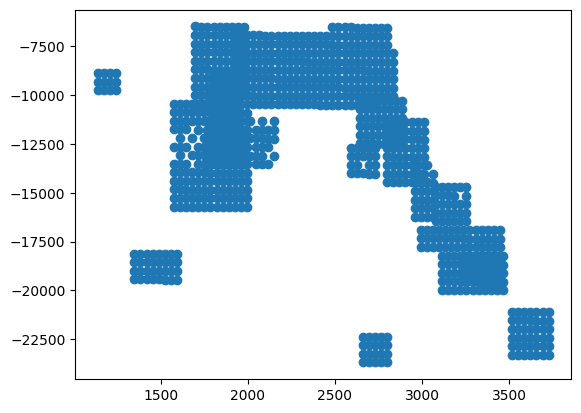

In [23]:
# make a scatterplot of the first and seconds columns of channel_map
plt.scatter(channel_map[:,2],channel_map[:,1]* -1)

In [32]:
processed_data = data_down[ channel_map[:,0].astype(int), : ]

In [36]:
channel_xy= channel_map[:,1:3]

## Save Data

Save the dataset. We save the data in the folder `ephys_raw` instead of ephys so that the data is available on Github.

<font color="orange">This line is commented out to make sure we don't accidently overwrite the previous saved data

In [37]:
import pickle

In [39]:
to_pickle = {"data": processed_data, "xy": channel_xy, "frame_rate": down_fs}

In [42]:
# with open( '/workspaces/human_hippocampus/data/ephys_raw/2022-11-02-e-Hc11.1-chip16753/D_start5s_stop15s_fs1ms.pkl' , 'wb') as file:
#     pickle.dump(to_pickle, file)

check that we can load the data correctly

In [43]:
file = open('/workspaces/human_hippocampus/data/ephys_raw/2022-11-02-e-Hc11.1-chip16753/D_start5s_stop15s_fs1ms.pkl', 'rb')
checkit = pickle.load(file)
file.close()


In [45]:
#checkit

# <font color="red">BAD-</font>Create  dataset without biccuculine 

## Review Data

load in data

In [46]:
from human_hip.basics import read_phy_files, raster_plot, raster_fancy_plot
import matplotlib.pyplot as plt

In [47]:
sd = read_phy_files( "/workspaces/human_hippocampus/data/ephys/2022-11-02-e-Hc11.1-chip16753/derived/kilosort2/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_curated.zip" )

look at data

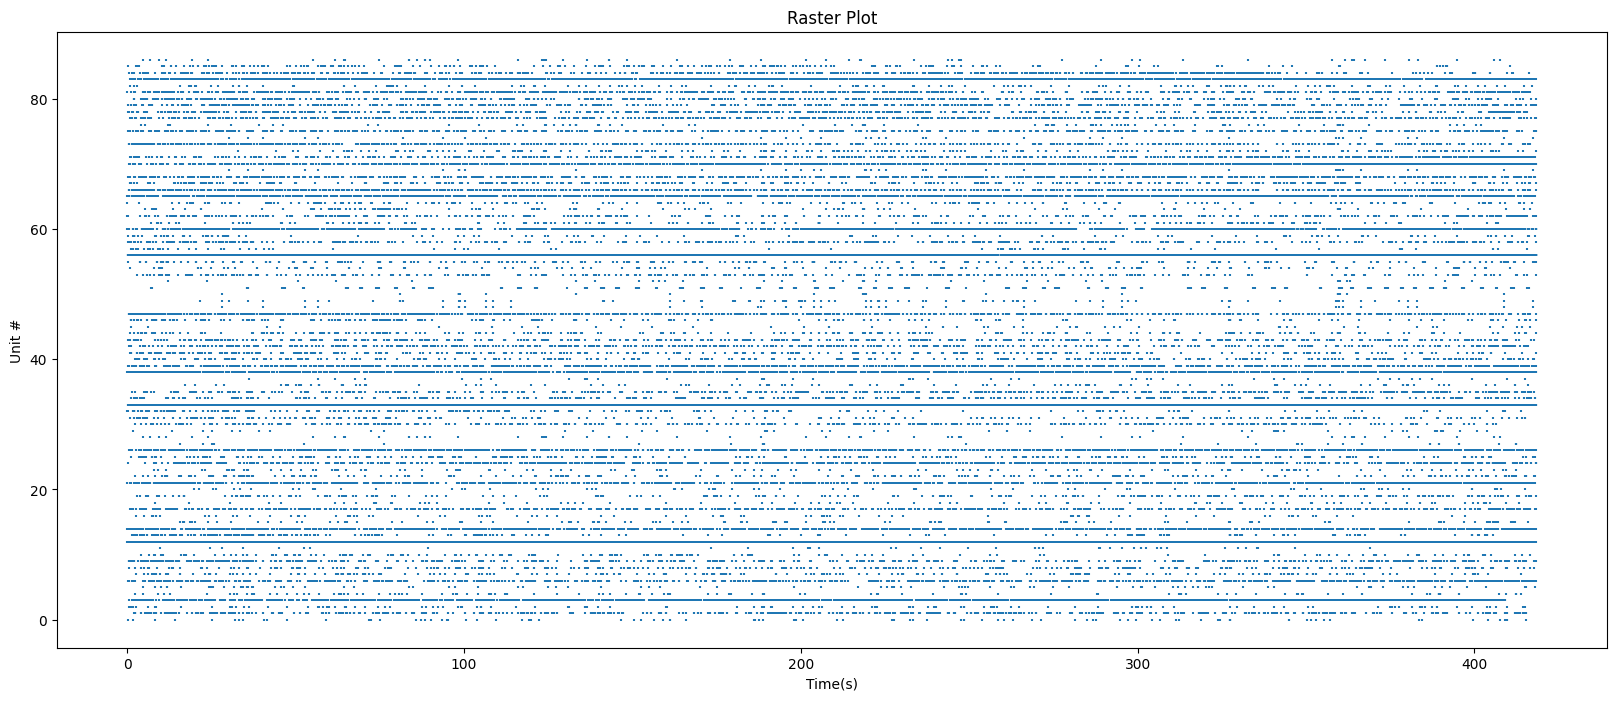

In [48]:
fig, ax = plt.subplots(figsize=(20, 8))
raster_plot(sd, ax)
plt.show()

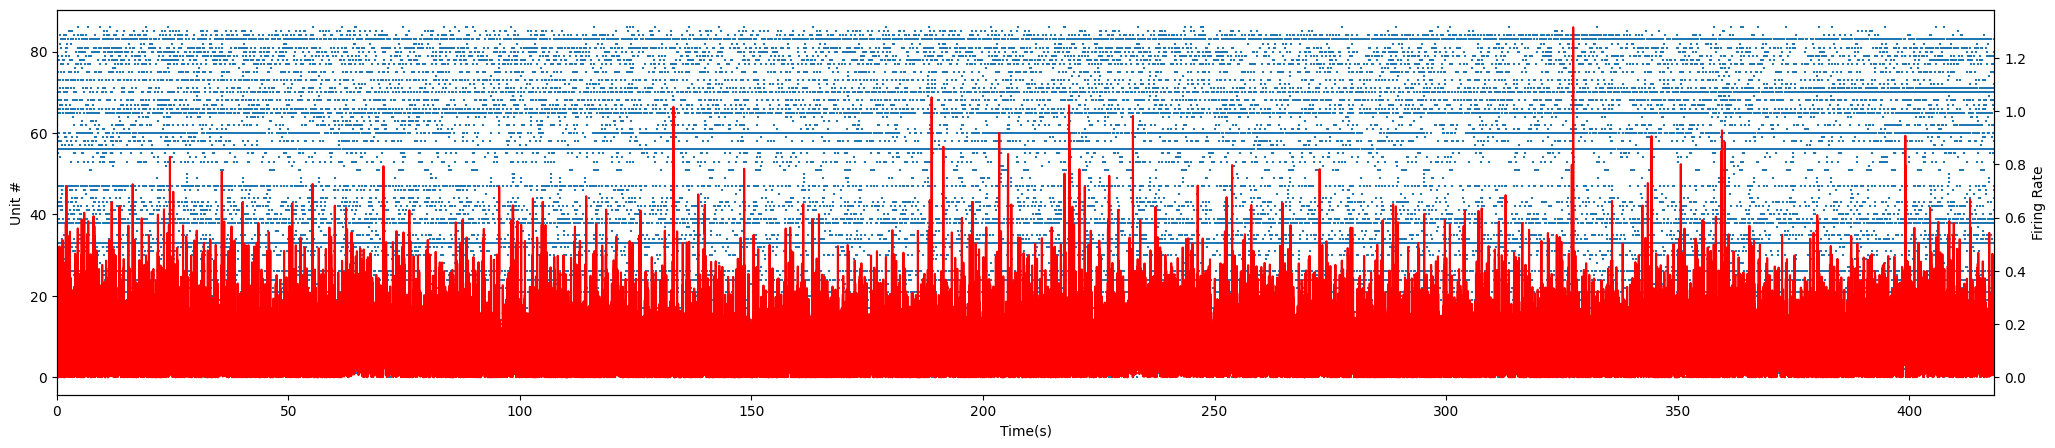

In [49]:
raster_fancy_plot(sd, xsize=25, ysize=5)

zoom in on suspect regions

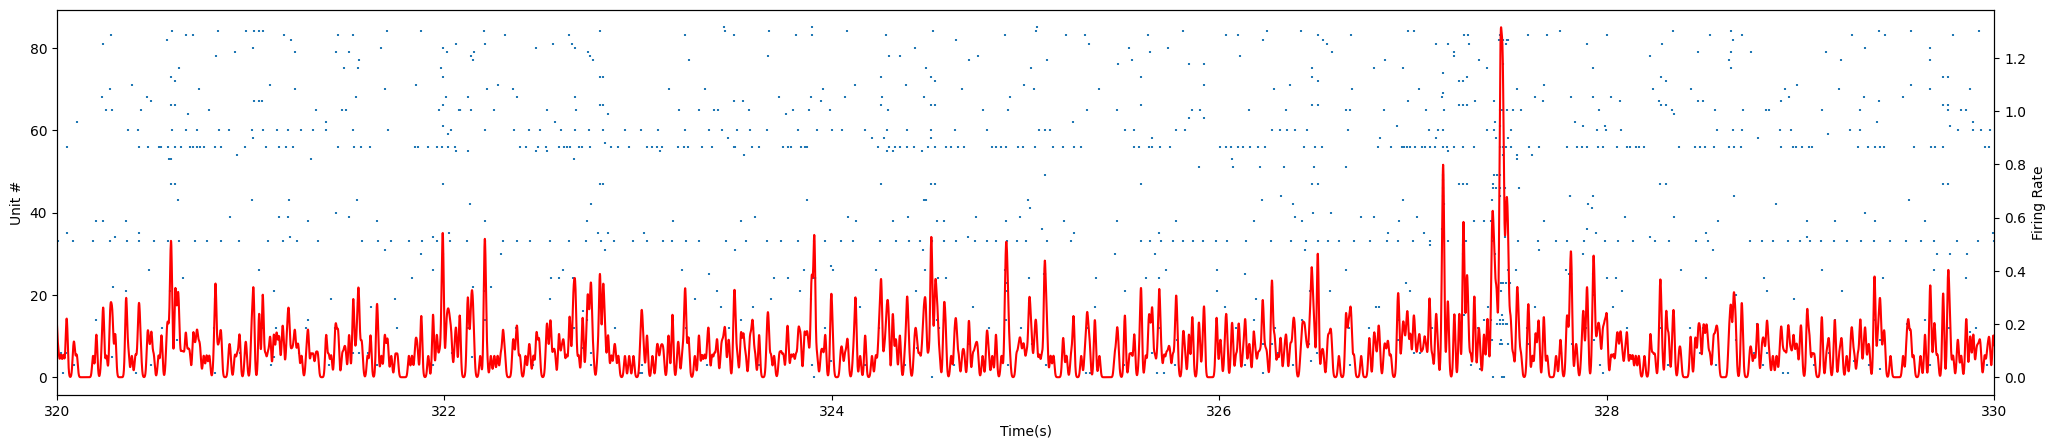

In [50]:
raster_fancy_plot(sd, xsize=25, ysize=5, start_time=320, stop_time=330)

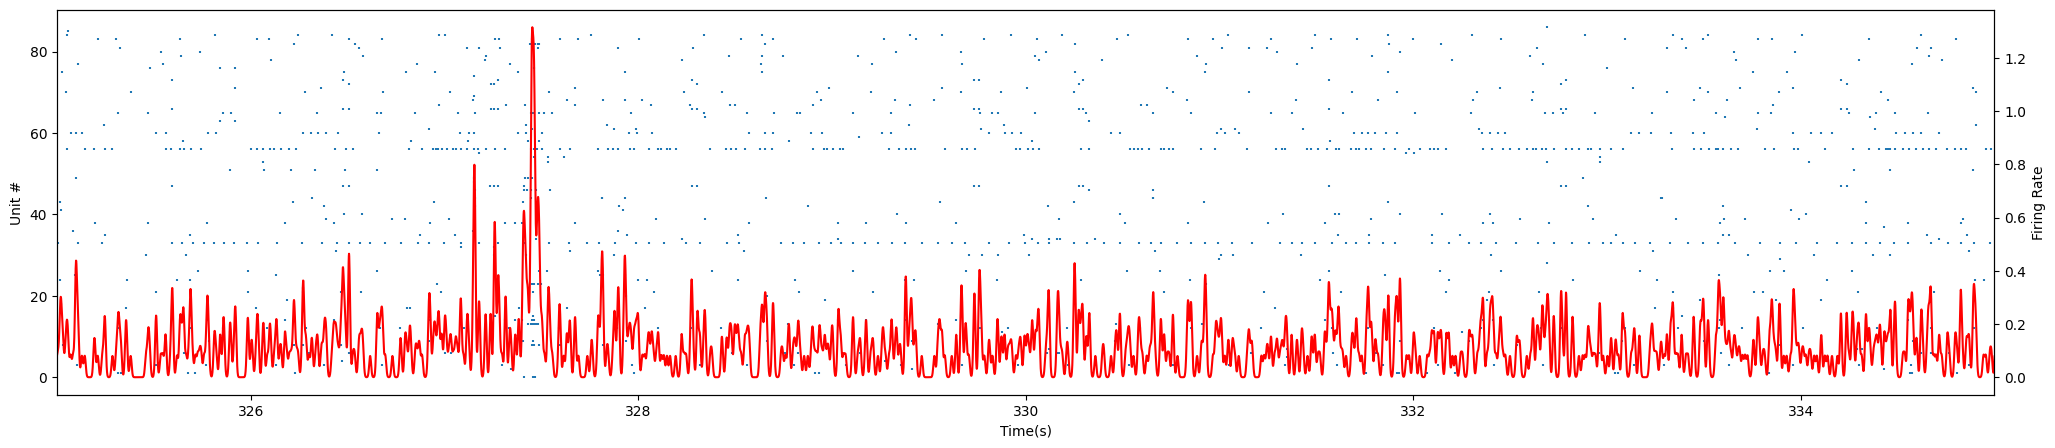

In [51]:
raster_fancy_plot(sd, xsize=25, ysize=5, start_time=325, stop_time=335)

## Download Data

we download the raw datasets locally using the general command from the `data access` tutorial

In [ ]:
### view folders:
# aws --endpoint https://s3.braingeneers.gi.ucsc.edu s3 ls s3://braingeneers/ephys/2022-11-02-e-Hc11.1-chip16753/
### download raw data
# cd /workspaces/human_hippocampus/data/ephys/2022-11-02-e-Hc11.1-chip16753/original/data
# aws --endpoint https://s3.braingeneers.gi.ucsc.edu s3 cp s3://braingeneers/ephys/2022-11-02-e-Hc11.1-chip16753/original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate.raw.h5 .

in the metadata we see that experiment 3 is the one we want

In [52]:
#metadata["ephys_experiments"].keys()
for key,val in metadata["ephys_experiments"].items():
    print(key)
    print(val["blocks"])
#in the metadata we see that experiment 3 is one we want

experiment3
[{'num_frames': 8368400, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate.raw.h5'}]
experiment1
[{'num_frames': 5557600, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_stim.raw.h5'}]
experiment5
[{'num_frames': 3794400, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_stim-B.raw.h5'}]
experiment4
[{'num_frames': 9440800, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_stim-C.raw.h5'}]
experiment2
[{'num_frames': 11353000, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_D.raw.h5'}]
experiment6
[{'num_frames': 9698200, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_E.raw.h5'}]


Load in data from experiment 3

In [53]:
# load in data from experiment 3
raw_data = ephys.load_data( metadata=metadata, experiment="experiment3", offset=325*20000, length=10*20000, channels=None )

/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:197: UserWarning: Dataset 2022-11-02-e-Hc11.1-chip16753 is not in row-major format, the parallel data reader can't be used, read speeds may be slow over a network.
  warnings.warn(f'Dataset {batch_uuid} is not in row-major format, the parallel data reader '
/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:209: UserWarning: Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.
  warnings.warn('Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.')


In [54]:
# check the shape of the data
raw_data.shape

(1028, 200000)

## Downsample data

Now that we have loaded the data into python we have select a subset of time from the data for which we want to analyze. For our analysis we don't actually need to consider every 20000 datapoints per second. For this reason, we `downsample` this subset of the data, which means that we consider, say, every other datapoint. This cuts the size of the data in half. In actuallity we on take every 20th datapoint.

In [55]:
decimate = 20
fs= 20000
down_fs = fs/decimate

In [56]:
data_down = []  # the variable that will hold the downsambled data
for i in range(len(raw_data)-4): # we run this loop for all code except the last 4 channels, because they are dummy data
    data_down.append( downsample( raw_data[i, 0:(fs*20)], dec=decimate, fs=fs)[1]  ) # we select the first 20seconds of the data, and then downsample it
data_down = np.array( data_down ) # we turn the data into an np.array for easier future analysis

In [57]:
# check the shape of the data
data_down.shape

(1024, 10000)

## Channel Electrode Mapping

In [59]:
import numpy as np
from matplotlib import pyplot as plt

In [61]:
channel_map = metadata['ephys_experiments']['experiment3']["mapping"]
channel_map = np.array(channel_map)

In [62]:
channel_map

array([[0.0000e+00, 1.0430e+04, 1.5750e+03, 8.2250e+02],
       [1.0000e+00, 1.5586e+04, 3.2550e+03, 1.2250e+03],
       [2.0000e+00, 1.0872e+04, 1.6100e+03, 8.5750e+02],
       ...,
       [1.0210e+03, 9.3510e+03, 1.9425e+03, 7.3500e+02],
       [1.0220e+03, 1.6016e+04, 3.0800e+03, 1.2600e+03],
       [1.0230e+03, 9.1660e+03, 2.5550e+03, 7.1750e+02]])

In [ ]:
channel_map[:,1]
channel_map[:,2]

array([1575. , 3255. , 1610. , 3412.5, 1907.5, 3062.5, 1715. , 3027.5,
       1680. , 2905. , 1960. , 3342.5, 1855. , 3185. , 1172.5, 3377.5,
       1802.5, 2695. , 1837.5, 3220. , 2135. , 3027.5, 2170. , 3307.5,
       2082.5, 3220. , 1960. , 3342.5, 1837.5, 2730. , 1207.5, 3412.5,
       1767.5, 3080. , 1890. , 3290. , 2117.5, 3377.5, 1907.5, 3185. ,
       1207.5, 3010. , 1172.5, 3255. , 1802.5, 3447.5, 1855. , 3307.5,
       2152.5, 3062.5, 1890. , 3132.5, 2082.5, 2817.5, 1942.5, 3202.5,
       1837.5, 3255. , 1610. , 3272.5, 1802.5, 2695. , 1855. , 3325. ,
       1715. , 3027.5, 1907.5, 3290. , 1207.5, 3115. , 1977.5, 3150. ,
       1820. , 2747.5, 1610. , 3167.5, 1767.5, 2765. , 1890. , 3430. ,
       1680. , 2905. , 1960. , 3097.5, 2100. , 3010. , 1995. , 3150. ,
       1785. , 2940. , 1837.5, 3220. , 1715. , 2887.5, 1907.5, 3465. ,
       1942.5, 2905. , 1960. , 3115. , 1837.5, 2852.5, 1610. , 3167.5,
       1767.5, 3272.5, 1785. , 3430. , 1732.5, 3185. , 1907.5, 3465. ,
      

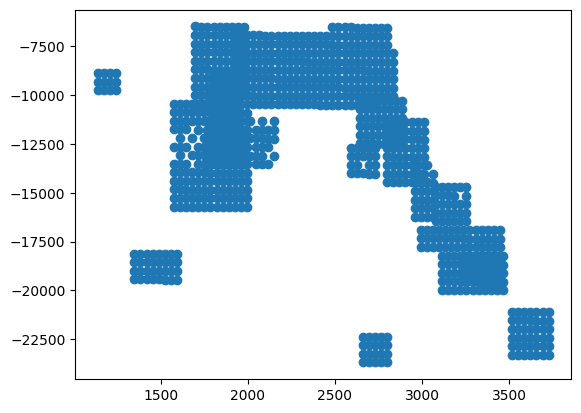

In [63]:
# make a scatterplot of the first and seconds columns of channel_map
plt.scatter(channel_map[:,2],channel_map[:,1]* -1)

In [64]:
processed_data = data_down[ channel_map[:,0].astype(int), : ]

In [65]:
channel_xy= channel_map[:,1:3]

## Save Data

Save the dataset. We save the data in the folder `ephys_raw` instead of ephys so that the data is available on Github.

<font color="orange">This line is commented out to make sure we don't accidently overwrite the previous saved data

In [66]:
to_pickle = {"data": processed_data, "xy": channel_xy, "frame_rate": down_fs}

In [67]:
# with open( '/workspaces/human_hippocampus/data/ephys_raw/2022-11-02-e-Hc11.1-chip16753/immediate_start325s_stop335s_fs1ms.pkl' , 'wb') as file:
#     pickle.dump(to_pickle, file)

check that we can load the data correctly

In [68]:
file = open('/workspaces/human_hippocampus/data/ephys_raw/2022-11-02-e-Hc11.1-chip16753/immediate_start325s_stop335s_fs1ms.pkl', 'rb')
checkit = pickle.load(file)
file.close()
checkit

{'data': array([[536.82697, 537.73566, 537.14886, ..., 528.896  , 528.8574 ,
         528.8524 ],
        [535.84827, 534.9623 , 534.5358 , ..., 518.06287, 518.19495,
         518.5771 ],
        [513.0736 , 513.71985, 513.4156 , ..., 499.6807 , 499.3851 ,
         498.77863],
        ...,
        [509.0702 , 507.10596, 507.16644, ..., 493.92865, 493.58862,
         493.39487],
        [531.1016 , 531.51263, 531.33234, ..., 519.13934, 519.51917,
         519.60254],
        [545.90186, 546.62085, 545.99524, ..., 525.59436, 525.4774 ,
         525.52405]], dtype=float32),
 'xy': array([[10430. ,  1575. ],
        [15586. ,  3255. ],
        [10872. ,  1610. ],
        ...,
        [ 9351. ,  1942.5],
        [16016. ,  3080. ],
        [ 9166. ,  2555. ]]),
 'frame_rate': 1000.0}

# <font color="green">GOOD?-</font>Create  dataset without biccuculine 

## Review Data

load in data

In [41]:
from human_hip.basics import read_phy_files, raster_plot, raster_fancy_plot
import matplotlib.pyplot as plt

In [42]:
sd = read_phy_files( "/workspaces/human_hippocampus/data/ephys/2022-11-02-e-Hc11.1-chip16753/derived/kilosort2/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_curated.zip" )

look at data

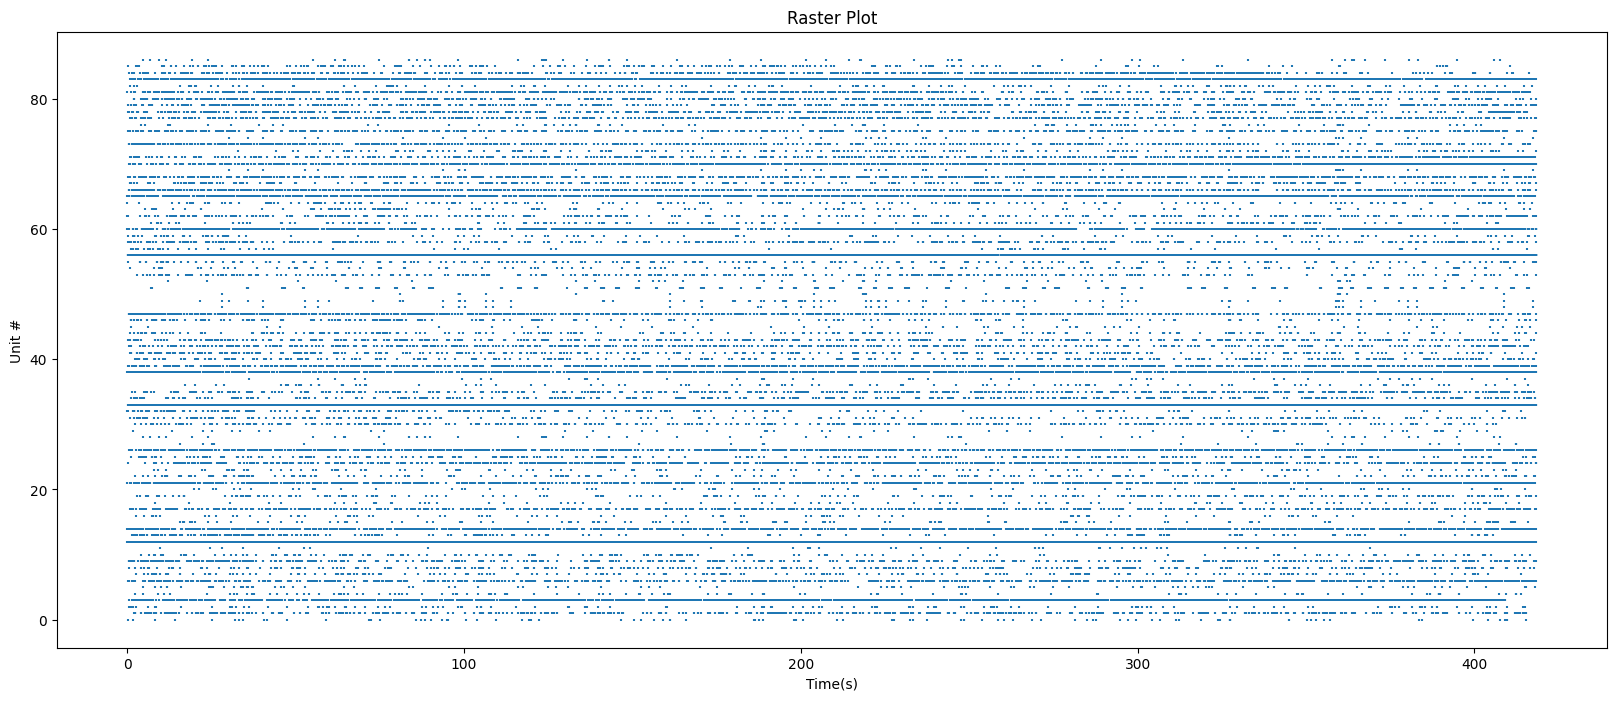

In [43]:
fig, ax = plt.subplots(figsize=(20, 8))
raster_plot(sd, ax)
plt.show()

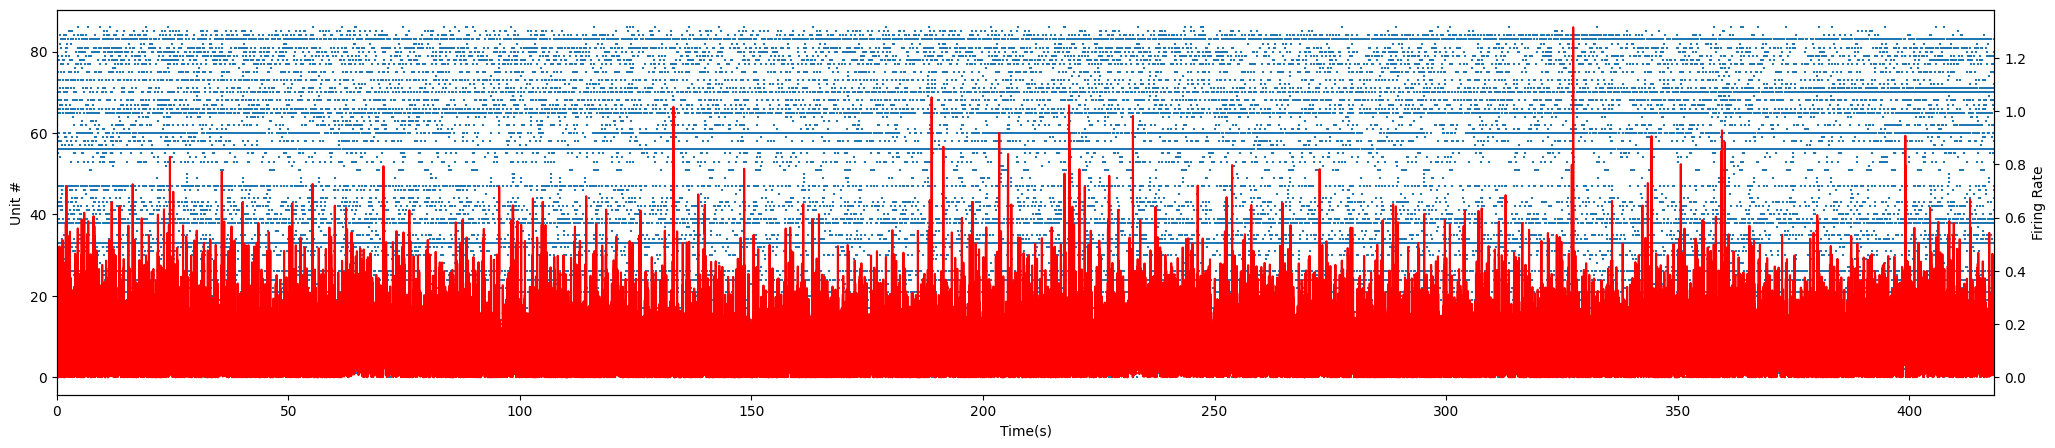

In [44]:
raster_fancy_plot(sd, xsize=25, ysize=5)

zoom in on suspect regions

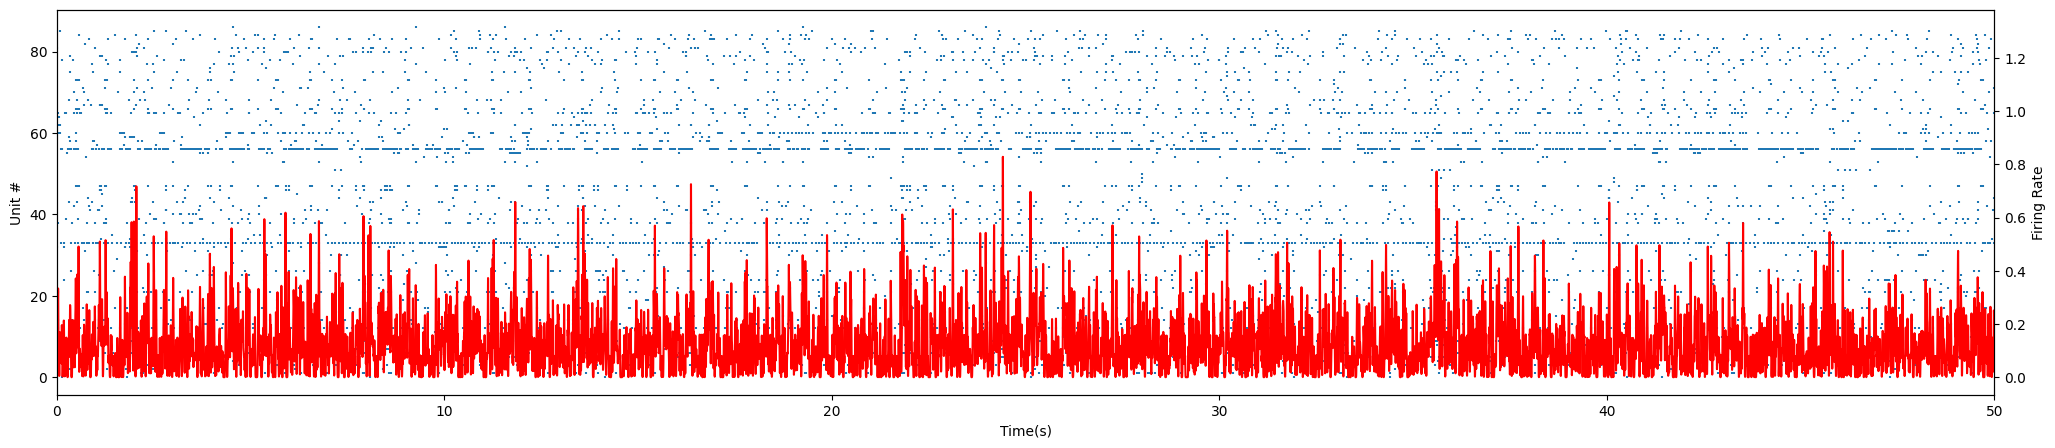

In [45]:
raster_fancy_plot(sd, xsize=25, ysize=5, start_time=0, stop_time=50)

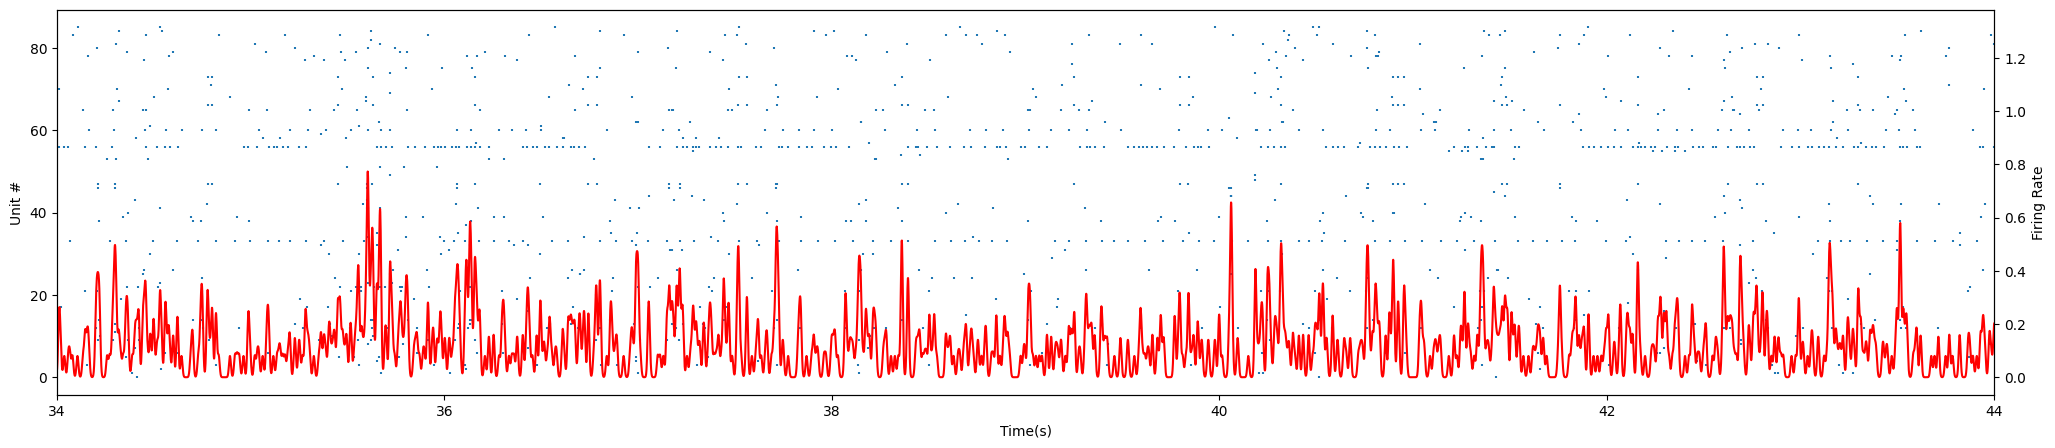

In [46]:
raster_fancy_plot(sd, xsize=25, ysize=5, start_time=34, stop_time=44)

## Download Data

we download the raw datasets locally using the general command from the `data access` tutorial

In [ ]:
### view folders:
# aws --endpoint https://s3.braingeneers.gi.ucsc.edu s3 ls s3://braingeneers/ephys/2022-11-02-e-Hc11.1-chip16753/
### download raw data
# cd /workspaces/human_hippocampus/data/ephys/2022-11-02-e-Hc11.1-chip16753/original/data
# aws --endpoint https://s3.braingeneers.gi.ucsc.edu s3 cp s3://braingeneers/ephys/2022-11-02-e-Hc11.1-chip16753/original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate.raw.h5 .

in the metadata we see that experiment 3 is the one we want

In [47]:
braingeneers.set_default_endpoint("/workspaces/human_hippocampus/data")
metadata = ephys.load_metadata("2022-11-02-e-Hc11.1-chip16753")

In [48]:
#metadata["ephys_experiments"].keys()
for key,val in metadata["ephys_experiments"].items():
    print(key)
    print(val["blocks"])
#in the metadata we see that experiment 3 is one we want

experiment3
[{'num_frames': 8368400, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate.raw.h5'}]
experiment1
[{'num_frames': 5557600, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_stim.raw.h5'}]
experiment5
[{'num_frames': 3794400, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_stim-B.raw.h5'}]
experiment4
[{'num_frames': 9440800, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_stim-C.raw.h5'}]
experiment2
[{'num_frames': 11353000, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_D.raw.h5'}]
experiment6
[{'num_frames': 9698200, 'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_E.raw.h5'}]


Load in data from experiment 3

In [49]:
# load in data from experiment 3
raw_data = ephys.load_data( metadata=metadata, experiment="experiment3", offset=34*20000, length=10*20000, channels=None )

/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:197: UserWarning: Dataset 2022-11-02-e-Hc11.1-chip16753 is not in row-major format, the parallel data reader can't be used, read speeds may be slow over a network.
  warnings.warn(f'Dataset {batch_uuid} is not in row-major format, the parallel data reader '
/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:209: UserWarning: Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.
  warnings.warn('Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.')


In [50]:
# check the shape of the data
raw_data.shape

(1028, 200000)

## Downsample data

Now that we have loaded the data into python we have select a subset of time from the data for which we want to analyze. For our analysis we don't actually need to consider every 20000 datapoints per second. For this reason, we `downsample` this subset of the data, which means that we consider, say, every other datapoint. This cuts the size of the data in half. In actuallity we on take every 20th datapoint.

In [51]:
decimate = 20
fs= 20000
down_fs = fs/decimate

In [52]:
data_down = []  # the variable that will hold the downsambled data
for i in range(len(raw_data)-4): # we run this loop for all code except the last 4 channels, because they are dummy data
    data_down.append( downsample( raw_data[i, 0:(fs*20)], dec=decimate, fs=fs)[1]  ) # we select the first 20seconds of the data, and then downsample it
data_down = np.array( data_down ) # we turn the data into an np.array for easier future analysis

In [53]:
# check the shape of the data
data_down.shape

(1024, 10000)

## Channel Electrode Mapping

In [54]:
import numpy as np
from matplotlib import pyplot as plt

In [55]:
channel_map = metadata['ephys_experiments']['experiment3']["mapping"]
channel_map = np.array(channel_map)

In [56]:
channel_map

array([[0.0000e+00, 1.0430e+04, 1.5750e+03, 8.2250e+02],
       [1.0000e+00, 1.5586e+04, 3.2550e+03, 1.2250e+03],
       [2.0000e+00, 1.0872e+04, 1.6100e+03, 8.5750e+02],
       ...,
       [1.0210e+03, 9.3510e+03, 1.9425e+03, 7.3500e+02],
       [1.0220e+03, 1.6016e+04, 3.0800e+03, 1.2600e+03],
       [1.0230e+03, 9.1660e+03, 2.5550e+03, 7.1750e+02]])

In [57]:
channel_map[:,1]
channel_map[:,2]

array([1575. , 3255. , 1610. , 3412.5, 1907.5, 3062.5, 1715. , 3027.5,
       1680. , 2905. , 1960. , 3342.5, 1855. , 3185. , 1172.5, 3377.5,
       1802.5, 2695. , 1837.5, 3220. , 2135. , 3027.5, 2170. , 3307.5,
       2082.5, 3220. , 1960. , 3342.5, 1837.5, 2730. , 1207.5, 3412.5,
       1767.5, 3080. , 1890. , 3290. , 2117.5, 3377.5, 1907.5, 3185. ,
       1207.5, 3010. , 1172.5, 3255. , 1802.5, 3447.5, 1855. , 3307.5,
       2152.5, 3062.5, 1890. , 3132.5, 2082.5, 2817.5, 1942.5, 3202.5,
       1837.5, 3255. , 1610. , 3272.5, 1802.5, 2695. , 1855. , 3325. ,
       1715. , 3027.5, 1907.5, 3290. , 1207.5, 3115. , 1977.5, 3150. ,
       1820. , 2747.5, 1610. , 3167.5, 1767.5, 2765. , 1890. , 3430. ,
       1680. , 2905. , 1960. , 3097.5, 2100. , 3010. , 1995. , 3150. ,
       1785. , 2940. , 1837.5, 3220. , 1715. , 2887.5, 1907.5, 3465. ,
       1942.5, 2905. , 1960. , 3115. , 1837.5, 2852.5, 1610. , 3167.5,
       1767.5, 3272.5, 1785. , 3430. , 1732.5, 3185. , 1907.5, 3465. ,
      

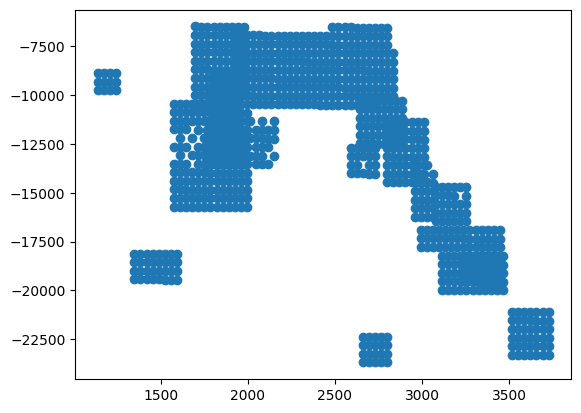

In [58]:
# make a scatterplot of the first and seconds columns of channel_map
plt.scatter(channel_map[:,2],channel_map[:,1]* -1)

In [59]:
processed_data = data_down[ channel_map[:,0].astype(int), : ]
processed_data.shape

(995, 10000)

In [60]:
channel_xy= np.array( [channel_map[:,2],channel_map[:,1]* -1] ).T

## Save Data

Save the dataset. We save the data in the folder `ephys_raw` instead of ephys so that the data is available on Github.

<font color="orange">This line is commented out to make sure we don't accidently overwrite the previous saved data

In [61]:
to_pickle = {"data": processed_data, "xy": channel_xy, "frame_rate": down_fs}

In [62]:
import pickle

In [63]:
# with open( '/workspaces/human_hippocampus/data/ephys_raw/2022-11-02-e-Hc11.1-chip16753/immediate_start34s_stop44s_fs1ms.pkl' , 'wb') as file:
#     pickle.dump(to_pickle, file)

check that we can load the data correctly

In [64]:
file = open('/workspaces/human_hippocampus/data/ephys_raw/2022-11-02-e-Hc11.1-chip16753/immediate_start34s_stop44s_fs1ms.pkl', 'rb')
checkit = pickle.load(file)
file.close()
checkit

{'data': array([[529.90356, 529.58966, 530.17975, ..., 533.6888 , 533.29926,
         532.6228 ],
        [528.05597, 527.86194, 527.3877 , ..., 528.5189 , 527.6158 ,
         527.2972 ],
        [503.08374, 503.51007, 502.2233 , ..., 507.2531 , 507.2106 ,
         506.8695 ],
        ...,
        [501.1526 , 499.488  , 500.136  , ..., 496.83713, 496.38184,
         496.42365],
        [526.0048 , 524.2862 , 525.04456, ..., 519.5704 , 519.87244,
         520.16675],
        [542.82935, 544.731  , 543.2217 , ..., 544.19995, 544.2612 ,
         543.7325 ]], dtype=float32),
 'xy': array([[  1575. , -10430. ],
        [  3255. , -15586. ],
        [  1610. , -10872. ],
        ...,
        [  1942.5,  -9351. ],
        [  3080. , -16016. ],
        [  2555. ,  -9166. ]]),
 'frame_rate': 1000.0}